In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from astropy import constants as const

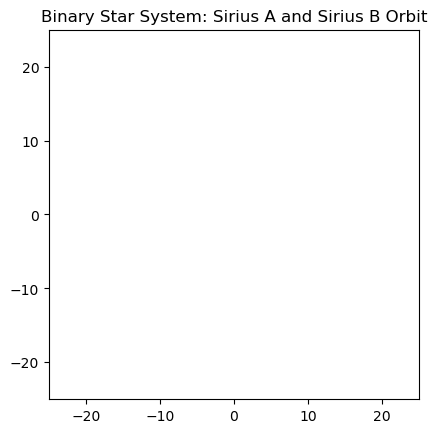

In [62]:
# --- Constants ---
SA_mass = 2.063 # solar masses
SB_mass = 1.018 # solar masses
mass_total = SA_mass + SB_mass
P = 50.1284     # period (years)
n = 2 * np.pi / P
a = 19.8        # Semi-major axis (AU)
e = 0.59142     # eccentricity
b = a * np.sqrt(1- e**2) # semi-minor axis
i = 136.336     # inclination (degrees)
n_frames = 200  # Number of frames in animation
G = const.G

def kepler_eq(mean_anomaly, e, tol = 1e-6):
    E = mean_anomaly
    for _ in range(100):
        f = E - e * np.sin(E) - mean_anomaly
        fp = 1 - e * np.cos(E)
        E_new = E - f / fp
        if abs(E_new - E) < tol:
            return E_new
        E = E_new
    return E

def true_position(E):
    x_rel = a * (np.cos(E) - e)
    y_rel = b * np.sin(E)
    return x_rel, y_rel

def barycentric_positions(x_rel, y_rel):
    x1 = - (SB_mass / mass_total) * x_rel
    y1 = - (SB_mass / mass_total) * y_rel

    x2 = (SA_mass / mass_total) * x_rel
    y2 = (SA_mass / mass_total) * y_rel

    return x1, y1, x2, y2

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.set_title('Binary Star System: Sirius A and Sirius B Orbit')

SA, = ax.plot([], [], marker = '*', c = 'gold')
SB, = ax.plot([], [], marker = '*', c = 'blue')
CM, = ax.plot([], [], 'rx', markersize = 4)

plt.show()

t = 0
dt = P / n_frames

def update(frame):
    global t
    t += 0.02 * P
    mean_anomaly = n * t
    E = kepler_eq(mean_anomaly, e)
    x_rel, y_rel = true_position(E)
    x1, y1, x2, y2 = barycentric_positions(x_rel, y_rel)

    SA.set_data([x1], [y1])
    SB.set_data([x2], [y2])
    CM.set_data([0], [0])
    return SA, SB

ani = FuncAnimation(fig, update, frames=1000, interval=20, blit = True)
writer = PillowWriter(fps = 10)
ani.save('Orbit_part_2.gif', writer = writer)
plt.show()